### Single cell analysis of human PDAC tissues

The scRNA-seq data from 16 human PDAC tissues, we observed the mere presence of <1% of the MUC16 expressing mesothelial cells and furthermore, MUC16 expression is evidently limited to two epithelial clusters namely cluster C4 & C11 alongside faint expression in cluster C12, whereas the expression of MUC1 & MSLN are more uniformly distributed across the epithelial cells.Interestingly, a myoepithelial cluster exhibiting smooth muscle cell-like transcriptional activity with increased expression of mesenchymal markers (SNAI2, AMIGO2), cytoplasmic ribosomal proteins (RPS6, RPL32, RPL6) and epithelial markers (KRT7,8,18, 19 & MUC1) was observed. Due to the presence of mesenchymal and acinar cells in the mucin expressing clusters, we reclustered the epithelial cell clusters and observed ~ 29% of cells in the epithelial clusters are myoepithelial cells expressing mesenchymal markers (VIM, CALD1 SNAI2, TGFB1) spanning across multiple cell clusters (Figure). Therefore, we attempted to identify if  We observed that the fraction of cells in the epithelial clusters express myoepthelial markers like Caldesmon 1 (CALD1) (2.2% cells;  C7, C12, C21) and metaplastic markers like MECOM (5.8%) and ONECUT2 (3.7% ) (C3,C4,C7, C11, C12, C21). Moreover, we observed the  expression of metaplastic markers in acinar and mesenchymal cluster (C12, & C5 respectively) comparable with metaplastic cluster (C2). In mesenchymal cluster, we observed two distinct intermediate populations expressing myeloid and neuroendocrine/myoepithelial markers (AMIGO2, TGFBI, CALD1) (Figure: heatmap). On the contrary, acinar cluster showed subtle presence of myoepithelial cells. In both the clusters, we observed that metaplastic marker ONECUT2 and osteopontin (SPP1) is expressed by intermediate and ductal cells. Moreover, MUC1 is relatively overexpressed in myoepithelial cells compared to ductal cells and  myoepithelial cells and pathways such as DNA repair, Hypoxia, TNF-alpha and interferon alpha signaling are overrepresented in MUC1 expressing ductal cells. Several effectors of TP53/TP63/HIF1A (CDKN2A, S100P, ATF3, MXD1, F3, POLR2K, ELF3) signaling are upregulated in the MUC1 expressing ductal cells indicative of epithelial differentiation. Further, MUC1 expressing ductal cells that coexpress stratified mucins like MUC4, MUC5AC, MUC20 and MUC16 show overexpression of Glycolytic (HK2, ENO2, ELF3, CLDN3), Epithelial (CDH1, EPCAM) and stratification/differentiation markers (AGR2, AGR3, ATF3) compared to myoepthelial and other MUC1 expressing cells. The proportion of MUC1 expressing epithelial cells significantly correlated with the proportion of cells that also expressed stratified mucins (MUC4, MUC20, MUC16 and MUC5AC) across all patients. 

We observed that majority of MUC16 expressing cells coexpress MUC20 and MUC5AC. In addition, MUC16 expressing cells show more increased reliance on glycolytic (HK2, ENO2, ELF3, CLDN3) and unfolded protein response (YWHAZ, ASS1) pathways. MUC16 expressing cells also coexpress several cornification (PLAT, SPPR1A, SPRR3, SCEL, CASP14) and squamous markers (CEACAM5, CEACAM7, TACSTD2, GPR87) relative to other mucin expressing cells. 

In [3]:
## R script to process the single cell human PDAC data (GSE155698). 
##required files (untitled markers file)

library(Seurat)
library(rhdf5)
library(monocle3)
library(SeuratWrappers)
library(pheatmap)
library(RColorBrewer)
library(dplyr)
library(Seurat)
library(reshape2)
library(ggpubr)
library(EnvStats)

Warning message:
“package ‘Seurat’ was built under R version 4.0.5”
Attaching SeuratObject

Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, 

In [6]:
setwd("~/Documents/GSE155698/")

In [7]:
files = list.files(recursive = T)
print(files)

  [1] "256_cells_adm.csv"                                         
  [2] "acinar.csv"                                                
  [3] "APC_FAP.csv"                                               
  [4] "APCmin_adenoma_vs_control_colon.csv"                       
  [5] "APCmin_vs_nonapc_single_sample.csv"                        
  [6] "APCmin_vs_onesample_nonAPC_adenoma.csv"                    
  [7] "APCvsNonAPC_FAP.csv"                                       
  [8] "bars_seurat.csv"                                           
  [9] "c1_producing_cells.csv"                                    
 [10] "c5_ff.csv"                                                 
 [11] "c7.csv"                                                    
 [12] "cancer_LS_vs_normal.csv"                                   
 [13] "cflar_vs_myc.csv"                                          
 [14] "cluster12.csv"                                             
 [15] "colon.gz"                                              

In [8]:
## Samples being filtered out are 11A & 11B

files = files[grep("TISSUE", files)]
idx = grep("_11", files)
files = files[-idx]
print(files)

 [1] "PDAC_TISSUE_1/filtered_feature_bc_matrix/barcodes.tsv.gz" 
 [2] "PDAC_TISSUE_1/filtered_feature_bc_matrix/features.tsv.gz" 
 [3] "PDAC_TISSUE_1/filtered_feature_bc_matrix/matrix.mtx.gz"   
 [4] "PDAC_TISSUE_10/filtered_feature_bc_matrix/barcodes.tsv.gz"
 [5] "PDAC_TISSUE_10/filtered_feature_bc_matrix/features.tsv.gz"
 [6] "PDAC_TISSUE_10/filtered_feature_bc_matrix/matrix.mtx.gz"  
 [7] "PDAC_TISSUE_12/filtered_feature_bc_matrix/barcodes.tsv.gz"
 [8] "PDAC_TISSUE_12/filtered_feature_bc_matrix/features.tsv.gz"
 [9] "PDAC_TISSUE_12/filtered_feature_bc_matrix/matrix.mtx.gz"  
[10] "PDAC_TISSUE_13/filtered_feature_bc_matrix/barcodes.tsv.gz"
[11] "PDAC_TISSUE_13/filtered_feature_bc_matrix/features.tsv.gz"
[12] "PDAC_TISSUE_13/filtered_feature_bc_matrix/matrix.mtx.gz"  
[13] "PDAC_TISSUE_14/filtered_feature_bc_matrix.h5"             
[14] "PDAC_TISSUE_15/filtered_feature_bc_matrix/barcodes.tsv.gz"
[15] "PDAC_TISSUE_15/filtered_feature_bc_matrix/features.tsv.gz"
[16] "PDAC_TISSUE_15/filt

In [9]:
### creating variable with concise directory containing all samples (n = 14) under consideration. 
nam = gsub("matrix.+$", "matrix", files)
nam = unique(nam)
ix = grep("h5", nam)
nam = nam[-ix]
nam = nam[grep("TISSUE", nam)]
print(nam)
print(length(nam))

 [1] "PDAC_TISSUE_1/filtered_feature_bc_matrix" 
 [2] "PDAC_TISSUE_10/filtered_feature_bc_matrix"
 [3] "PDAC_TISSUE_12/filtered_feature_bc_matrix"
 [4] "PDAC_TISSUE_13/filtered_feature_bc_matrix"
 [5] "PDAC_TISSUE_14/filtered_feature_bc_matrix"
 [6] "PDAC_TISSUE_15/filtered_feature_bc_matrix"
 [7] "PDAC_TISSUE_16/filtered_feature_bc_matrix"
 [8] "PDAC_TISSUE_2/filtered_feature_bc_matrix" 
 [9] "PDAC_TISSUE_3/filtered_feature_bc_matrix" 
[10] "PDAC_TISSUE_4/filtered_feature_bc_matrix" 
[11] "PDAC_TISSUE_5/filtered_feature_bc_matrix" 
[12] "PDAC_TISSUE_6/filtered_feature_bc_matrix" 
[13] "PDAC_TISSUE_7/filtered_feature_bc_matrix" 
[14] "PDAC_TISSUE_8/filtered_feature_bc_matrix" 
[15] "PDAC_TISSUE_9/filtered_feature_bc_matrix" 
[1] 15


In [10]:
### using for loop to load all the sample matrices into a single sparse matrix 
nam2 = nam[-5]
c = c()
a = Read10X(nam2[1])
c = rep(nam2[1], ncol(a))
for(i in 2:length(nam2)){
    a1 = Read10X(nam2[i])
    c = append(c, rep(nam2[i], ncol(a1)))
    a = cbind(a, a1)}

In [11]:
## In our manuscript we removed on PDAC_TISSUE_14 due inagreement between the file formats. Also PDAC_TISSUE_14 has no viable cells expressing MUC16

new = Read10X_h5("PDAC_TISSUE_14/filtered_feature_bc_matrix.h5")
all(rownames(a) == rownames(new))
aa = cbind(a, new)
print(dim(aa))
c = append(c, rep("PDAC_TISSUE_14", ncol(new)))
c = gsub(".filter.+$", "", c)
a = aa


Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”


[1] TRUE

[1] 32738 42692


In [12]:
### subsequently transforming it to a seurat matrix. 
### The seurat object has  32738 features 
pbmc = CreateSeuratObject(a)
pbmc$orig.ident = c
print(pbmc)

Warning message:
“Non-unique cell names (colnames) present in the input matrix, making unique”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
32738 features across 42692 samples within 1 assay 
Active assay: RNA (32738 features, 0 variable features)


In [13]:
### calculating percentage of mitochondrial reads
pbmc[["percent.mt"]] <- PercentageFeatureSet(pbmc, pattern = "^MT-")


In [14]:
### Subset the matrix to remove cells with > 5% mitochondrial reads and expression of < 200 features
### filtered object should have around 14691 cells (19429 cells if PDAC_TISSUE_14 is considered)
pbmc <- subset(pbmc, subset = nFeature_RNA > 200 &  percent.mt < 5)
print(pbmc)

An object of class Seurat 
32738 features across 16635 samples within 1 assay 
Active assay: RNA (32738 features, 0 variable features)


In [15]:
### using standard log normalize for normalization
pbmc <- NormalizeData(pbmc, normalization.method = "LogNormalize", scale.factor = 10000)

In [16]:
## using 2000 highly variable features for PCA
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)
all.genes <- rownames(pbmc)
pbmc <- ScaleData(pbmc, features = all.genes)
pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))

Centering and scaling data matrix

PC_ 1 
Positive:  IGFBP7, CALD1, COL1A2, BGN, COL3A1, SPARC, AEBP1, DCN, COL1A1, C1R 
	   COL6A2, C1S, MGP, THY1, MXRA8, FBN1, LUM, COL5A2, MYL9, COL4A2 
	   FSTL1, CNN3, COX7A1, TAGLN, CDH11, PCOLCE, SULF1, IGFBP4, CCDC80, COL6A3 
Negative:  ITGB2, LYZ, FCER1G, SERPINA1, G0S2, IGSF6, IL1B, IL8, S100A12, TREM1 
	   CD74, IL1R2, FCGR3A, ANPEP, CCL4, CD14, CD247, GPR183, IL1RN, CD7 
	   HLA-DQB1, HSPA6, DUSP2, NPL, HLA-DRB1, RP11-1143G9.4, C19orf59, HLA-DRA, CD27, FCGR2B 
PC_ 2 
Positive:  SMIM22, FXYD3, TM4SF1, CLDN4, GPRC5A, KRT8, KRT19, ELF3, KRT18, TSPAN1 
	   CEACAM6, KRT7, S100A14, TACSTD2, LMO7, SDCBP2, AGR2, PDZK1IP1, LGALS4, ATP1B1 
	   LCN2, TMC5, TSPAN8, LIPH, GOLM1, PLS1, LAMB3, CEACAM5, RP11-462G2.1, SLPI 
Negative:  ITGB2, FCER1G, HLA-DPB1, HLA-DPA1, FCGR3A, CD14, IGSF6, HLA-DRA, IL1B, FGL2 
	   HLA-DQB1, GPNMB, RGS1, GPR183, HLA-DQA1, TREM1, CCL4, CD74, FCGR2B, PLIN2 
	   ANPEP, CYBB, MS4A6A, S100A12, CD84, APOE, MS4A7, LAIR1, HLA-DQA2, V

In [17]:
### considering first 35 PCs explaining 85 % of the variance to perform clustering
pbmc <- FindNeighbors(pbmc, dims = 1:35)
pbmc <- FindClusters(pbmc, resolution = 0.5)
pb = pbmc

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 16635
Number of edges: 671553

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9445
Number of communities: 26
Elapsed time: 1 seconds


In [ ]:
### Isolating MUC1 cells for lineage tracing from epithelial clusters

sc = pbb@assays$RNA@scale.data
idx = colnames(sc)[which(sc["MUC1",] > min(sc["MUC1", ]))]
idx2 = colnames(sc)[which(sc["SNAI2",] > min(sc["SNAI2", ]))]
root = intersect(idx, idx2)
pbmc =subset(pbb, cells = idx)


### Reclustering of these cells

## using 2000 highly variable features for PCA
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 500)
all.genes <- rownames(pbmc)
pbmc <- ScaleData(pbmc, features = all.genes)
pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))
### considering first 35 PCs explaining 85 % of the variance to perform clustering
pbmc <- FindNeighbors(pbmc, dims = 1:20)
pbmc <- FindClusters(pbmc, resolution = 0.5)
pbmc = RunUMAP(pbmc, dims = 1:20)
pb = pbmc


### MUC1 expressing ductal cells considerably differ from MUC1 expressing myoepithelial cells 
##### DNA REPAIR, HYPOXIA, TNF and TP53 pathways are upregulated. 
Term	Overlap	P-value	Adjusted P-value	Old P-value	Old Adjusted P-value	Odds Ratio	Combined Score	Genes
Interferon Alpha Response	5/97	2.4358824568357612E-4	0.00876917684460874	0	0	9.779150197628459	81.3628354952414	BST2;IFI27;HLA-C;GBP2;B2M
TNF-alpha Signaling via NF-kB	6/200	0.0010578646004516456	0.012694375205419748	0	0	5.587155963302752	38.280415456425374	PPP1R15A;MARCKS;MXD1;SAT1;F3;ATF3
Estrogen Response Late	6/200	0.0010578646004516456	0.012694375205419748	0	0	5.587155963302752	38.280415456425374	TSPAN13;TRIM29;TFF3;AGR2;TFF1;S100A9
Androgen Response	4/100	0.002661302293846886	0.023951720644621973	0	0	7.428303303303303	44.04196229800182	TMEM50A;SAT1;B2M;MYL12A
Estrogen Response Early	5/200	0.006011244988525066	0.030914974226700344	0	0	4.589743589743589	23.472515087972294	UGCG;ELF3;CLDN7;TFF3;TFF1
Interferon Gamma Response	5/200	0.006011244988525066	0.030914974226700344	0	0	4.589743589743589	23.472515087972294	BST2;IFI27;HLA-B;HLA-A;B2M
p53 Pathway	5/200	0.006011244988525066	0.030914974226700344	0	0	4.589743589743589	23.472515087972294	PPP1R15A;CDKN2A;MXD1;SAT1;ATF3
DNA Repair	4/150	0.01105383181181491	0.049742243153167096	0	0	4.872022707639146	21.94835579953837	ARL6IP1;GUK1;COX17;POLR2K
Hypoxia	4/200	0.028426371654516374	0.08527911496354912	0	0	3.6199669056811916	12.88866767649351	PLAC8;PPP1R15A;F3;ATF3

## Capturing mucin evolution arbitarily as lineage trajectory analysis failed to capture individual variations

In [19]:

## subset epithelial/myoepithelial clusters 
c = c("3","4","7","11","12", "21")
idd = c()
for(i in 1:length(c)){
    
idd = append(idd, names(pbmc$orig.ident[which(pbmc$seurat_clusters == c[i])]))}


    pbmc = subset(pb, cells = idd)
sc = pb@assays$RNA@scale.data

In [30]:
## using 1000 highly variable features for PCA
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 1000)
all.genes <- rownames(pbmc)
pbmc <- ScaleData(pbmc, features = all.genes)
pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))
### considering first 20 PCs explaining 85 % of the variance to perform clustering
pbmc <- FindNeighbors(pbmc, dims = 1:20)
pbmc <- FindClusters(pbmc, resolution = 0.5)
pbmc = RunUMAP(pbmc, dims = 1:20)
pbb = pbmc

Centering and scaling data matrix

PC_ 1 
Positive:  SPINK1, CYSTM1, CEACAM6, AGR2, TFF2, WFDC2, LGALS4, TFF1, DUOX2, ASS1 
	   CTSE, PRSS22, MACROD2, TFF3, GDF15, DDIT3, PDE4C, DUOXA2, FAM3D, PSCA 
	   MUC4, CEACAM7, CLU, APOL1, ANXA4, MUC17, PLAC8, DUSP5, DHRS9, CXCL17 
Negative:  MKI67, ASPM, NUSAP1, PTPRC, GMFG, TOP2A, CENPF, CDK1, VIM, GTSE1 
	   TYMS, CASC5, SRGN, KIFC1, AURKB, CORO1A, BIRC5, CELF2, CENPE, TPX2 
	   UBE2C, LCP1, CD53, LSP1, CD52, BUB1B, DLGAP5, LAPTM5, PTPRCAP, NUF2 
PC_ 2 
Positive:  MT-CO2, SPINK1, LYZ, TFF2, CEACAM6, CYSTM1, TFF1, CTSE, WFDC2, PLAC8 
	   AGR2, DUOX2, MACROD2, LGALS4, MUC17, TFF3, FAM3D, DUOXA2, ASS1, MUC4 
	   HSD17B2, DPCR1, FBP1, PIGR, HLA-DRB1, PSCA, ISG20, GSTM3, GPX2, RP11-1143G9.4 
Negative:  DCBLD2, LAMB1, LGALS1, FERMT1, CNTNAP2, MAP1B, TGM2, ITGB6, IGFBP6, HMGA2 
	   TGFBI, GPC6, PLAU, CALD1, RBP1, PODXL, ID1, CDH11, C2orf82, CRABP2 
	   IGFBP7, ZMAT3, NR2F1, DEFB1, TNS4, KRT16, TRIM54, S100A2, EFEMP1, SERPINE2 
PC_ 3 
Positive:  SERP

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4197
Number of edges: 148335

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8901
Number of communities: 13
Elapsed time: 0 seconds


16:11:31 UMAP embedding parameters a = 0.9922 b = 1.112

16:11:31 Read 4197 rows and found 20 numeric columns

16:11:31 Using Annoy for neighbor search, n_neighbors = 30

16:11:31 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:11:32 Writing NN index file to temp file /tmp/RtmpGdL95x/file4aa81ae7b80

16:11:32 Searching Annoy index using 1 thread, search_k = 3000

16:11:33 Annoy recall = 100%

16:11:33 Commencing smooth kNN distance calibration using 1 thread

16:11:34 Initializing from normalized Laplacian + noise

16:11:34 Commencing optimization for 500 epochs, with 171552 positive edges

16:11:45 Optimization finished



Warning message in rownames(mat):
“NaNs produced”


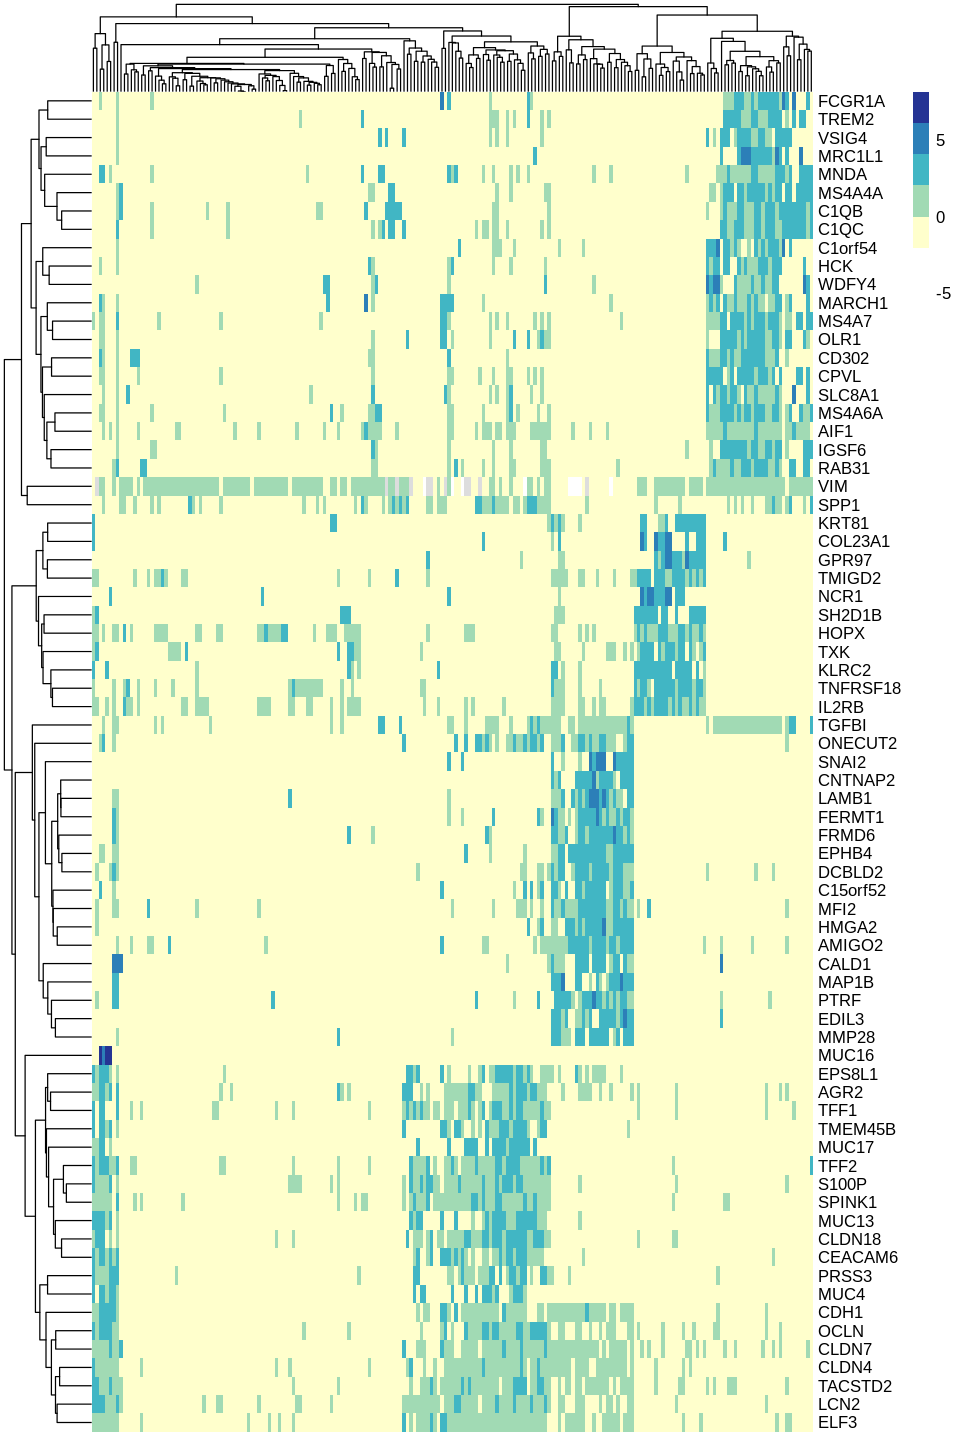

In [32]:
#### we observe a myoepithelial phenotype bridging mesenchymal to ductal switch in cluster 5 (only considering cluster 5)
idd = names(pbmc$orig.ident[which(pbmc$seurat_clusters== 5)])
tempst =sc[, idd]
l = read.csv("~/Untitled 1_markers.csv", header= T, stringsAsFactors = F)
options(repr.plot.width=8, repr.plot.height=12)
pheatmap(log2(tempst[c(l[,1], "MUC16", "MUC4", "CDH1", "ONECUT2", "CALD1", "TGFBI"), ]+1), scale = 'row', show_colnames = F, col = c("white", "white", "white", brewer.pal(5, "YlGnBu")))


Warning message in rownames(mat):
“NaNs produced”


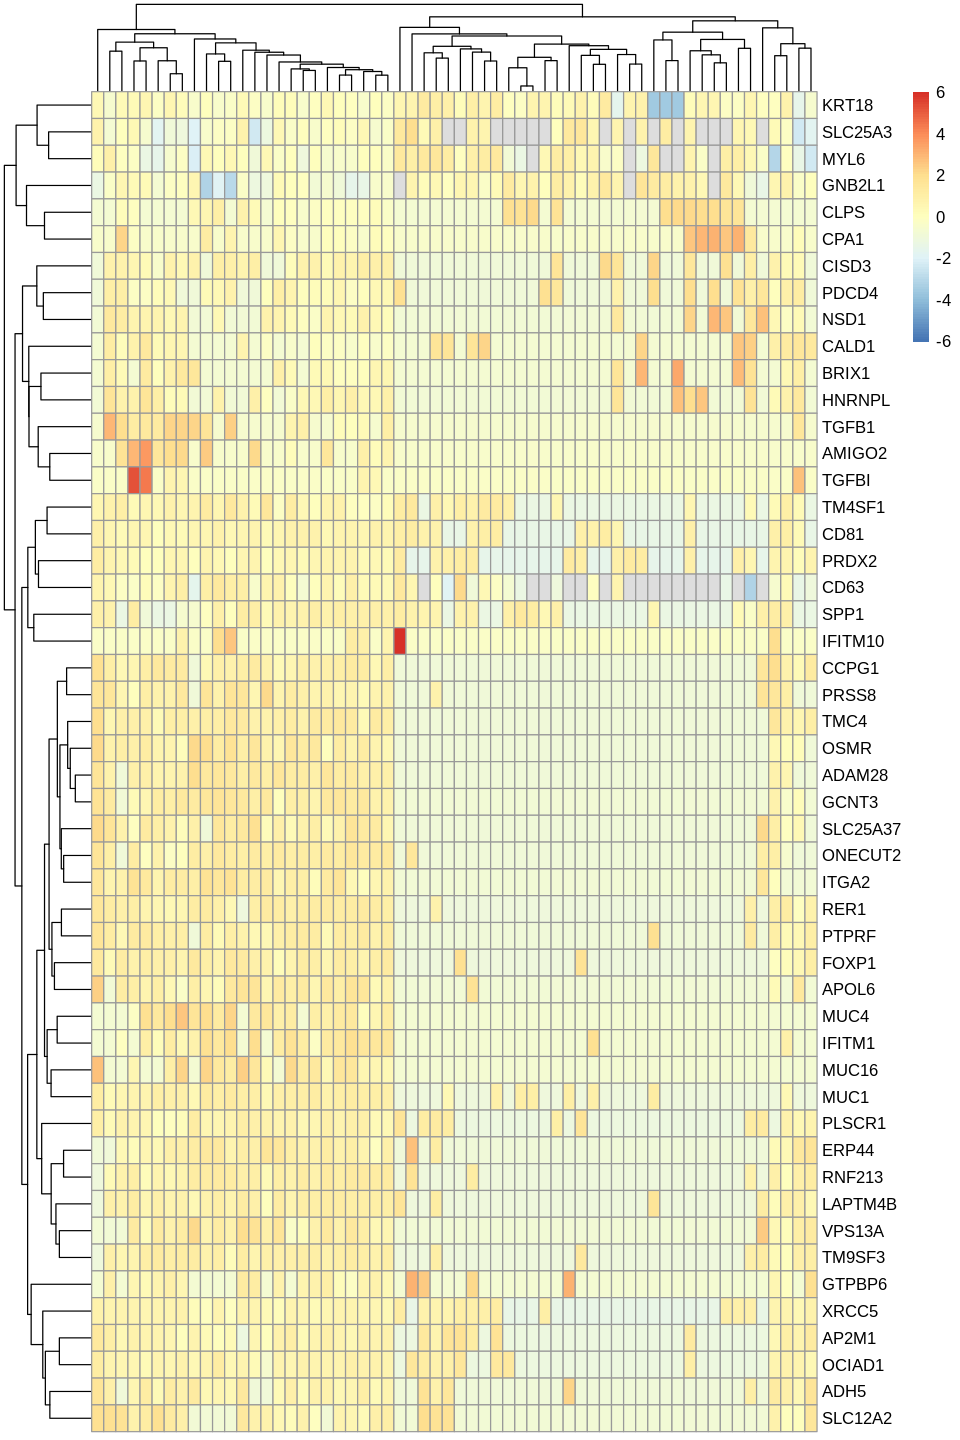

In [37]:
##### Similar to above we observed switch from acinar to ductal in the acinar cell cluster (cluster 12)

adm = l$ADM
adm  = adm[which(adm != "")]

idd = names(pbmc$orig.ident[(which(pbmc$seurat_clusters == 12))])
tempst =sc[, idd]

options(repr.plot.width=8, repr.plot.height=12)
pheatmap(log2(tempst[c(unique(adm), 
"TGFBI",
"IFITM10", "CALD1"),
]+1),scale ="row", show_colnames  = F)

In [39]:
### MUC1 expressing cells from epithelial clusters
pbb = pbmc
sc = pbb@assays$RNA@scale.data
idx = colnames(sc)[which(sc["MUC1",] > min(sc["MUC1", ]))]

pbmc =subset(pbb, cells = idx)

scc = pbmc@assays$RNA@scale.data

In [40]:
### Characterize MUC1 expressing cells and stratify them into different subgroups (myoepithelial, intermediate/other, differentiated cells (based on MUC4, MUC5AC and MUC16 expression )

idxx2 = colnames(scc)[which(scc["MUC1",] > min(scc["MUC1", ]))]

idxx3 = colnames(scc)[which(scc["SNAI2",] > min(scc["SNAI2", ]))]

int= intersect(idxx2, idxx3)

idxx2 = colnames(scc)[which(scc["MUC1",] > min(scc["MUC1", ]))]

idxx3 = colnames(scc)[which(scc["MUC4",] > min(scc["MUC4", ]))]

int2= intersect(idxx2, idxx3)
idxx2 = colnames(scc)[which(scc["MUC1",] > min(scc["MUC1", ]))]

idxx3 = colnames(scc)[which(scc["MUC16",] > min(scc["MUC16", ]))]

int3= intersect(idxx2, idxx3)

idxx2 = colnames(scc)[which(scc["MUC1",] > min(scc["MUC1", ]))]

idxx3 = colnames(scc)[which(scc["MUC20",] > min(scc["MUC20", ]))]

int4= intersect(idxx2, idxx3)


idxx2 = colnames(scc)[which(scc["MUC1",] > min(scc["MUC1", ]))]

idxx3 = colnames(scc)[which(scc["MUC5AC",] > min(scc["MUC5AC", ]))]

int5= intersect(idxx2, idxx3)


int = setdiff(int, c(int2, int3, int4, int5))
int2 = setdiff(int2, c(int, int3, int4, int5))
int4 = setdiff(int4, c(int2, int3, int, int5))
int5 = setdiff(int5, c(int2, int3, int4, int))
int3= setdiff(int3, c(int2, int, int4, int5))

other = setdiff( colnames(scc), c(int, int2, int3, int4, int5))


cluster1.markers <- FindMarkers(pbmc, ident.1 = int, ident.2 = c(int2, int3, int4, int5, other), min.pct = 0.25, only.pos = T)
cluster2.markers <- FindMarkers(pbmc, ident.1 = int2, ident.2 = c(int, int3, int4, int5, other), min.pct = 0.25, only.pos = T)
cluster3.markers <- FindMarkers(pbmc, ident.1 = int3, ident.2 = c(int2, int, int4, int5, other), min.pct = 0.25,only.pos = T)
cluster4.markers <- FindMarkers(pbmc, ident.1 = int4, ident.2 = c(int2, int3, int, int5, other), min.pct = 0.25, only.pos = T)
cluster5.markers <- FindMarkers(pbmc, ident.1 = int5, ident.2 = c(int2, int3, int4, int, other), min.pct = 0.25,only.pos = T)
otherr <- FindMarkers(pbmc, ident.1 = other, ident.2 = c(int2, int3, int4, int5, int), min.pct = 0.25,only.pos = T)

c = c(rownames(cluster1.markers)[1:5],rownames(cluster2.markers)[1:5], rownames(cluster3.markers)[1:5],rownames(cluster4.markers)[1:5], rownames(cluster5.markers)[1:5], rownames(otherr)[1:5])

In [ ]:
### overall markers
#c= c("MUC16", "MUC1","MUC16", "MUC4", c, "ELF3", "CLDN3", "CDH1", "AGR2", "ENO2", "CDKN2A", "S100P", "ATF3", "F3")
#c = unique(c)

In [41]:

df = data.frame(rep(0, ncol(scc)), row.names = colnames(scc))
df[int,1] = "Myo"
df[int2,1] = "MUC4"
df[int3,1] = "MUC16"
df[int4,1] = "MUC20"
df[int5,1] = "MUC5AC"
df[other,1] = "Other"



temp = scc[c, ]
colnames(temp) = df[,1]
mel = melt(temp)
head(mel)

,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,SNAI2,Other,-0.2877289
2,CNTNAP2,Other,-0.3301072
3,LAMB1,Other,-0.3709886
4,EDIL3,Other,-0.3366776
5,RPS4Y1,Other,-0.4973994
6,MUC4,Other,-0.5607495


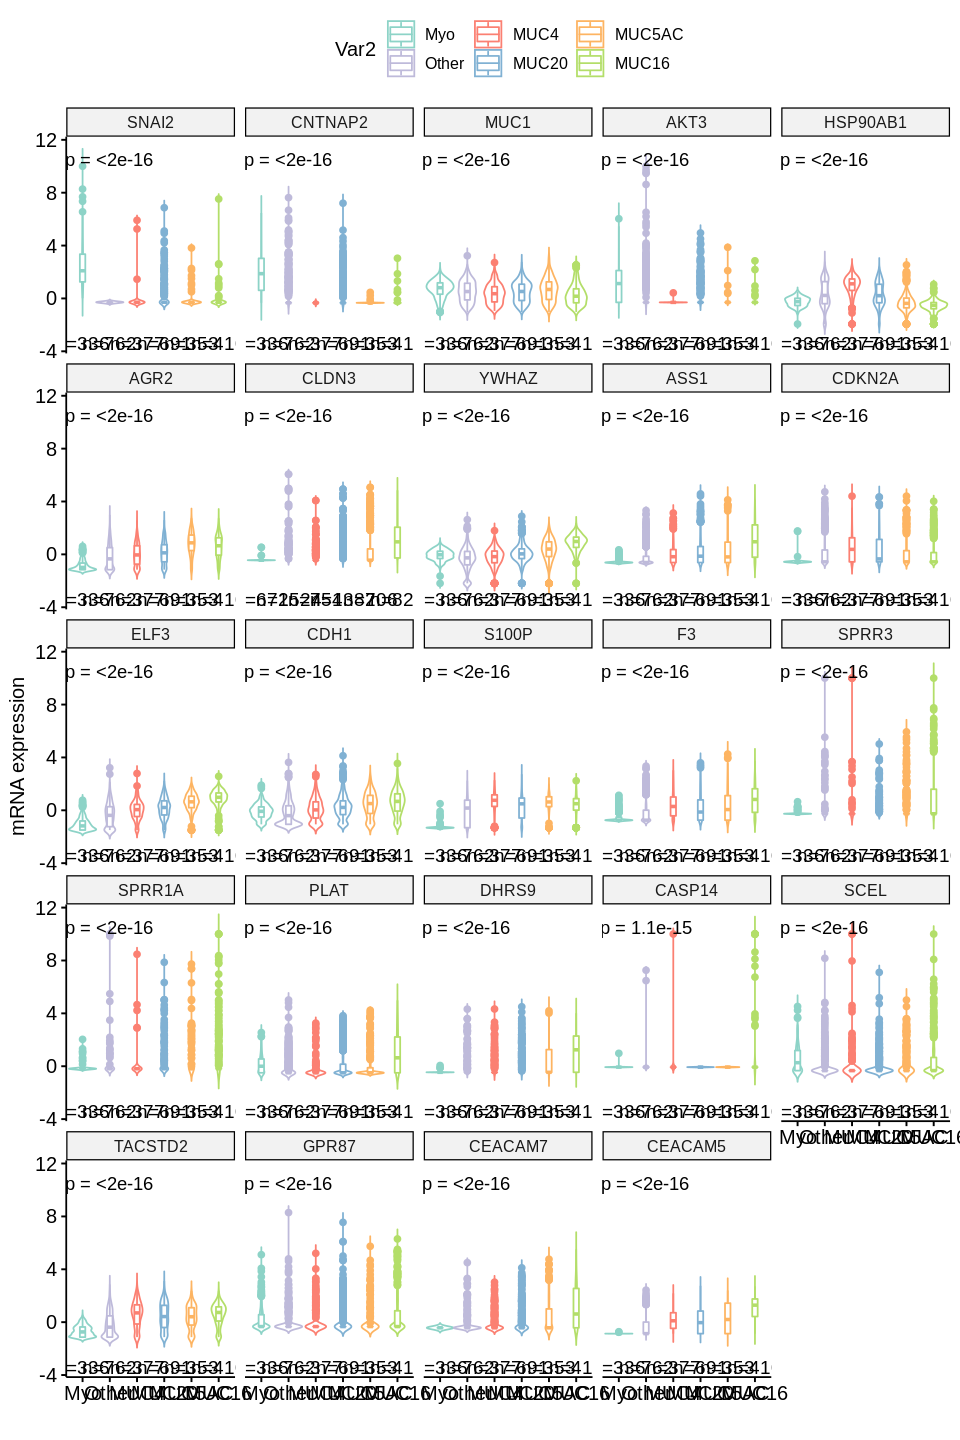

In [42]:
### Boxplots of different predefined markers using ggpubr

cto= c( "SNAI2", "CNTNAP2", "MUC1", "AKT3", "HSP90AB1", "AGR2", "CLDN3", "YWHAZ", "ASS1", "CDKN2A",  "ELF3", "CLDN3", "CDH1", "S100P", "F3", "SPRR3", "SPRR1A", "PLAT", "DHRS9", "CASP14", "SCEL", "TACSTD2", "GPR87", "CEACAM7", "CEACAM5")
 palette = brewer.pal(9, "Set3")[-2]
temp = scc[cto, ]
colnames(temp) = df[,1]
mel = melt(temp)
mel[,2] = factor(mel[,2], levels =c("Myo", "Other", "MUC4",  "MUC20", "MUC5AC","MUC16"))
p = ggviolin(mel, y = "value", x = "Var2",color = "Var2", palette = palette, ylab = "mRNA expression", xlab = "", add = "boxplot")
p = facet(p, facet.by = "Var1", nrow = 5, ncol = 5)
p = p + stat_compare_means( label = "p.format")
p = p +stat_n_text()
p
ggsave( "test.pdf",p, width = 10, height = 20)